##**Лабораторная работа №1. Классификация текстов на реальных данных**
Выполнена студентками группы ПИ21-2в Струевой Тамарой и Кучиной Ангелиной

Импорт необходимых библиотек

In [2]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
from requests import get # библиотека для получения данных с сайта
from bs4 import BeautifulSoup # библиотека для чтения данных из html
import pandas as pd # библиотека для работы с датасетом
import numpy as np # библиотека для работы с числами/пустыми значениями
import csv # библиотека для записи данных в файл
import matplotlib.pyplot as plt # библиотека для визуализации данных
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Автоматический сбор информации с отзывами с сайта banki.ru

In [ ]:
base_url = "https://www.banki.ru/insurance/responses/list/"

In [ ]:
def parse_source(url):
    main_url = 'https://www.banki.ru'
    data = {"header": [], "bank": [], "review": [], "rate": [], "date": []}

    i = 1
    # нажимакм на конпку «показать еще»
    page = get(f"{url}?page={i}&isMobile=0")
    while (page.status_code == 200 and i < 400):
        # читаем код страницы
        soup = BeautifulSoup(page.text, "lxml")
        # получаем тэги со ссылками на карточку отзыва
        all_reviews = soup.find_all("article", class_="responses__item")
        # print(all_reviews)

        # достаем ссылки из тэгов и помещаем их в список
        links = []
        for href in all_reviews:
            links.append(href.find("a", href=True)["href"])

        # проход по карточкам с отзывами в списке ссылок
        for link in links:
            # получаем данные из карточки
            result = get(f'{main_url}{link}')
            if (page.status_code == 200 and i < 400):
                content = result.text
                soup = BeautifulSoup(content, 'lxml')
                # получение отдельных данных для заполнения датасета

                try:
                  header = soup.find("h1").text.strip()
                  bank = soup.find("div", itemprop="itemreviewed").text.strip()
                  review = soup.find("div", class_ = "article-text response-page__text markup-inside-small markup-inside-small--bullet").text.strip()
                  rate = soup.find("span", class_ = "rating-grade").text.strip()
                  date = soup.find("time", itemprop="dtreviewed").text.strip()[:-6]
                  # print("i ", i, header, bank, rate, date, sep=", ")

                  data["header"].append(header)
                  data["bank"].append(bank)
                  data["review"].append(review)
                  data["rate"].append(rate)
                  data["date"].append(date)

                except AttributeError:
                  print("&&&")
                  continue
        i += 1
        page = get(f'https://www.banki.ru/insurance/responses/list/?page={i}&isMobile=0')
    return data

In [ ]:
df = pd.DataFrame(parse_source(base_url))

&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&


In [ ]:
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


### Запись данных в файл

Запишем данные, собранные выше, в файл, чтобы было удобнее и быстрее их доставать.

In [ ]:
filename = "insurance_reviews.csv"
df.to_csv(filename, index=False)

## Загрузка датасета

Читаем датасет из файла, так как код парсинга работает долго…

In [29]:
df = pd.read_csv("insurance_reviews.csv")
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


## Обработка данных

Изучим датасет и выведем его описательную характкристику. Обработаем/очистим данные для того, чтобы было удобнее их анализировать и визуализировать.

In [30]:
# выведем размерность датасета
df.shape

(9561, 5)

In [31]:
# выведем типы данных столбцов
df.dtypes

header    object
bank      object
review    object
rate       int64
date      object
dtype: object

In [32]:
# выведем основные статистические показатели столбца с оценками
df.describe()

,rate
count,9561.000000
mean,3.579856
std,1.865433
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
# выведем количество уникальных значений датасета по столбцам
df.nunique()

header    7105
bank        65
review    9551
rate         5
date       485
dtype: int64

In [34]:
# проверим количество повторяющихся отзывов
df["review"].duplicated().sum()

10

In [35]:
# выведем количество пустых значений датасета по столбцам
df.isna().sum()

header    0
bank      0
review    0
rate      0
date      0
dtype: int64

В результате изучения датасета и его наполнения выяснилось:

* размерность датасета - `(9561, 5)`;
* оценка указана в числовом формате `int64`, остальные столбцы - `object`;
* средняя оценка по отзывам - `3,58`;
* из 9561 отзывов уникальными являются 9551, 10 отзывов - дубликаты;
* нулевые значения отсутствуют;
* количество банков/организаций в датасете - `65`.

Следовательно, дубликаты необходимо удалить. Далее будет обработка и очистка данных.

In [36]:
# удаляем дубликаты отзывов
df.drop_duplicates(subset="review", inplace=True)
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


In [37]:
# изменение формата столбца даты с обходом и заменой строк, в которых дата указана некорректно
# (некорректные данные будут заменены на значение NaT)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors='coerce')
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,2024-01-20


При изменении формата данных обнаружилось, что не во всех строках указана корректная дата.
Посмотрим, сколько строк содержат ошибочные данные и удалим.

In [38]:
# количество строк с некорректной датой
df["date"].isna().sum()

1395

In [39]:
df.dropna(axis=0, subset="date", inplace=True)
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,2024-01-20


Проверим количество отзывов для каждой организации и удалим те, у которых количество отзывов меньше 100.

In [40]:
df_bank = df.groupby("bank").review.count().sort_values()
df_bank

bank
Ак Барс Страхование                      1
Росбанк Страхование                      1
РБ Страхование Жизни                     1
Ю-Лайф                                   1
НКО ПОВС «Страховой дом «Платинум»       1
                                      ... 
Ренессанс Жизнь                        383
АльфаСтрахование-Жизнь                 399
Сбербанк страхование                   939
Совкомбанк Страхование                 985
Т-Страхование                         2207
Name: review, Length: 65, dtype: int64

In [41]:
# получение спсика оорганизаций, у которых меньше 100 отзывов
organizations_less_100_reviews = df_bank.loc[df_bank.index.isin(df_bank.where(df_bank < 100).dropna().index)].index
organizations_less_100_reviews

Index(['Ак Барс Страхование', 'Росбанк Страхование', 'РБ Страхование Жизни',
       'Ю-Лайф', 'НКО ПОВС «Страховой дом «Платинум»',
       'Страховая фирма «Адонис»', 'Зетта Страхование жизни',
       'Зетта Страхование (бывшая СК «Альянс»)', 'Дефанс Страхование',
       'ПСБ Страхование', 'Пари',
       'Медицинская акционерная страховая компания (МАКС-М)',
       'Капитал МС (РГС-Медицина)', 'Двадцать первый век',
       'Русский Стандарт Страхование', 'АльфаСтрахование-ОМС',
       'ДЕЛО ЖИЗНИ (НСГ Страхование жизни)', 'Инсайт',
       'Русское страховое общество «Евроинс»', 'Бестиншур',
       'Инлайф страхование жизни', 'РЕСО-Мед', 'ППФ Страхование жизни',
       'Страховая бизнес группа', 'Газпром Страхование', 'Ингосстрах-Жизнь',
       'Объединенная страховая компания', 'Спасские ворота',
       'РСХБ-Страхование жизни', 'Энергогарант', 'БКС Страхование жизни',
       'РСХБ-Страхование', 'СОГАЗ-Мед', 'ВСК-Линия жизни',
       'Хоум Кредит Страхование', 'СК ГАЙДЕ', 'Капитал-Поли

In [42]:
# удаление отзывов огранизаций, у которых количество отзывов меньше 100, из датасета
# df.bank.isin(organizations_less_100_reviews)
# data[data.marks.isin(list1) == False]
df = df[df.bank.isin(list(organizations_less_100_reviews)) == False]
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9554,Тинькофф страхование,Т-Страхование,"Все прошло быстро, деньги поступили на карту у...",5,2024-01-21
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20


In [43]:
# выведем среднее количество отзывов для организаций
mean_number_of_reviews = round(df.groupby("bank").review.count().mean(), 2)
mean_number_of_reviews

530.71

Выведем
* размерность датасета, очищенного от дубликатов, пустых значений, некорректной даты и организаций с малым количеством отзывов;
* количество уникальных значений для очищенного датасета;
* описательную характеристику нового датасета.


In [44]:
df.shape

(7430, 5)

In [45]:
df.nunique()

header    5528
bank        14
review    7430
rate         5
date       247
dtype: int64

In [46]:
df.describe()

,rate
count,7430.000000
mean,3.734455
std,1.815010
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [47]:
mean_value = round(df.describe()["rate"]["mean"], 2)
mean_value

3.73

В результате обработки данных:
* размерность датасета стала `(7430, 5)` - удалили `2131` строки;
* средняя оценка по выборке стала `3.73` - выросла на `0,15`;
* были удалены дубликаты отзывов;
* были удалены строки, в котрых дата была указана неправильно;
* были удалены организации, у которых количество отзывов было меньше 100.

## Анализ предметной область (графики)

### График 1
Для первого графика мы возьмем топ 5 банков/организаций, основываясь на их средней оценке и выведем количество отзывов.

In [48]:
# сгруппируем данные по столбцу bank
df_group_by_bank = df.groupby("bank").rate.mean()
df_group_by_bank
# # отсортируем полученные данные по убыванию и возьмем первые 5
df_group_by_bank_sort = df_group_by_bank.sort_values(ascending=False)
df_group_by_bank_sort.head()

bank
Совкомбанк Страхование Жизни    4.866379
КАПИТАЛ LIFE                    4.637755
Совкомбанк Страхование          4.625381
Т-Страхование                   4.429542
Сбербанк страхование            4.064963
Name: rate, dtype: float64

In [49]:
top_5_org_by_rate = list(df_group_by_bank_sort.index)[:5]

# подсчитываем, сколько отзывов у каждой организации
number_of_rates = df.groupby("bank").review.count()

#
filtered_rates = number_of_rates.loc[number_of_rates.index.isin(top_5_org_by_rate)]
filtered_rates

bank
КАПИТАЛ LIFE                     196
Сбербанк страхование             939
Совкомбанк Страхование           985
Совкомбанк Страхование Жизни     232
Т-Страхование                   2207
Name: review, dtype: int64

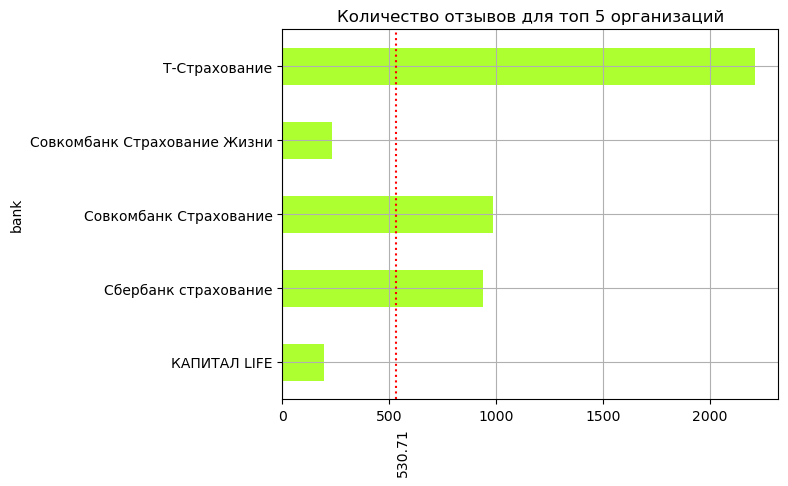

In [50]:
filtered_rates.plot(kind = "barh", color = "greenyellow")
plt.title("Количество отзывов для топ 5 организаций")
plt.axvline(x = mean_number_of_reviews, color = "red", linestyle = "dotted")
plt.text(x=mean_number_of_reviews, y=-1.5, s=str(mean_number_of_reviews), rotation="vertical")
plt.grid()
plt.show()

**Вывод:**

На диаграмме(которая показывает количество отзывов об организациях с наиболее высокой средней оценкой) видно, что
* люди чаще всего пишут отзывы про организацию `Т-Страхование` (отзывов больше 2000);
* у банков/организаций - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование` - отзывов больше, чем среднее число отзывов по организациям выборки;
* самый популярный банк/организация - `Т-Страхование`;
* количество отзывов о `Совкомбн Страхование Жизни` и `КАПИТАЛ LIFE` сильно ниже среднего значения.

### График 2
Для второго графика мы возьмем топ 5 банков/организаций, основываясь количестве оценнок и выведем среднюю оценку по их отзывам.

Данный график отражает более объективную картину, в отличие от предыдущего, так как 5 банков выбираются на основе отзывов (чем больше отзывов, тем объективнее будет средняя оценка).

In [51]:
# средние оценки отзывов для топ 5 банков/организаций
# топ 5 по количеству оценок

# сгруппируем данные по столбцу bank
df_group_by_bank_2 = df.groupby("bank").rate.count()

# отсортируем полученные данные по убыванию и возьмем первые 5
df_group_by_bank_sort_2 = df_group_by_bank_2.sort_values(ascending=False)
print("Количество отзывов в топ 5 организаций")
df_group_by_bank_sort_2.head()

Количество отзывов в топ 5 организаций


bank
Т-Страхование             2207
Совкомбанк Страхование     985
Сбербанк страхование       939
АльфаСтрахование-Жизнь     399
Ренессанс Жизнь            383
Name: rate, dtype: int64

In [52]:
top_5_org_by_rate_2 = list(df_group_by_bank_sort_2.index)[:5]
top_5_org_by_rate_2

['Т-Страхование',
 'Совкомбанк Страхование',
 'Сбербанк страхование',
 'АльфаСтрахование-Жизнь',
 'Ренессанс Жизнь']

In [53]:
mean_value_of_rates = df.groupby(["bank"]).rate.mean()

filtered_rates_2 = mean_value_of_rates.loc[mean_value_of_rates.index.isin(top_5_org_by_rate_2)]
filtered_rates_2

bank
АльфаСтрахование-Жизнь    2.538847
Ренессанс Жизнь           3.765013
Сбербанк страхование      4.064963
Совкомбанк Страхование    4.625381
Т-Страхование             4.429542
Name: rate, dtype: float64

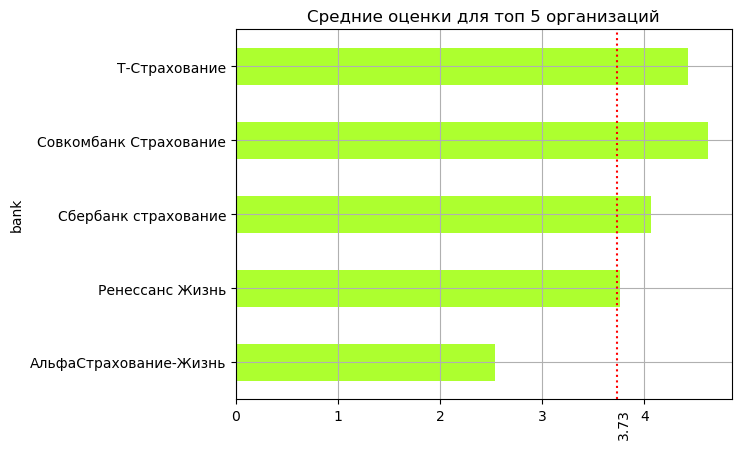

In [54]:
filtered_rates_2.plot(kind = "barh", color = "greenyellow")
plt.title("Средние оценки для топ 5 организаций")
plt.grid()
plt.axvline(x = mean_value, color = "red", linestyle = "dotted")
plt.text(x=mean_value, y=-1, s=str(mean_value), rotation="vertical")
plt.show()

**Вывод:**

На графике видно:
* 4 организации - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование`, `Ренесанс Жизнь` - имеют оценку выше средней по общей выборке;
* 3 организации - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование` - имеют среднюю оценку выше 4, то есть «Хорошо»;
* самая низкая оценка (намного ниже средней - ≈2,5) у `АльфаСтрахование-Жизнь`.

Для более детального анализа зависимости средней оценки и количества отзывов нарисуем еще 1 график.

### График 3
Для третьего графика мы возьмем топ 5 банков/организаций, основываясь количестве оценнок и выведем среднюю оценку по их отзывам.

In [55]:
# выводим среднюю оценку всех банков/организаций
all_mean_rates = df.groupby(["bank"]).rate.mean()
all_mean_rates

bank
АльфаСтрахование                1.386503
АльфаСтрахование-Жизнь          2.538847
ВСК                             2.850000
Ингосстрах                      3.014286
КАПИТАЛ LIFE                    4.637755
Ренессанс                       2.432886
Ренессанс Жизнь                 3.765013
Росгосстрах                     1.860825
СОГАЗ                           3.155556
Сбербанк страхование            4.064963
Сбербанк страхование жизни      2.007968
Совкомбанк Страхование          4.625381
Совкомбанк Страхование Жизни    4.866379
Т-Страхование                   4.429542
Name: rate, dtype: float64

In [56]:
# выводим количество отзывов всех банков/организаций
all_reviews = df.groupby(["bank"]).review.count()
all_reviews

bank
АльфаСтрахование                 326
АльфаСтрахование-Жизнь           399
ВСК                              380
Ингосстрах                       280
КАПИТАЛ LIFE                     196
Ренессанс                        298
Ренессанс Жизнь                  383
Росгосстрах                      194
СОГАЗ                            360
Сбербанк страхование             939
Сбербанк страхование жизни       251
Совкомбанк Страхование           985
Совкомбанк Страхование Жизни     232
Т-Страхование                   2207
Name: review, dtype: int64

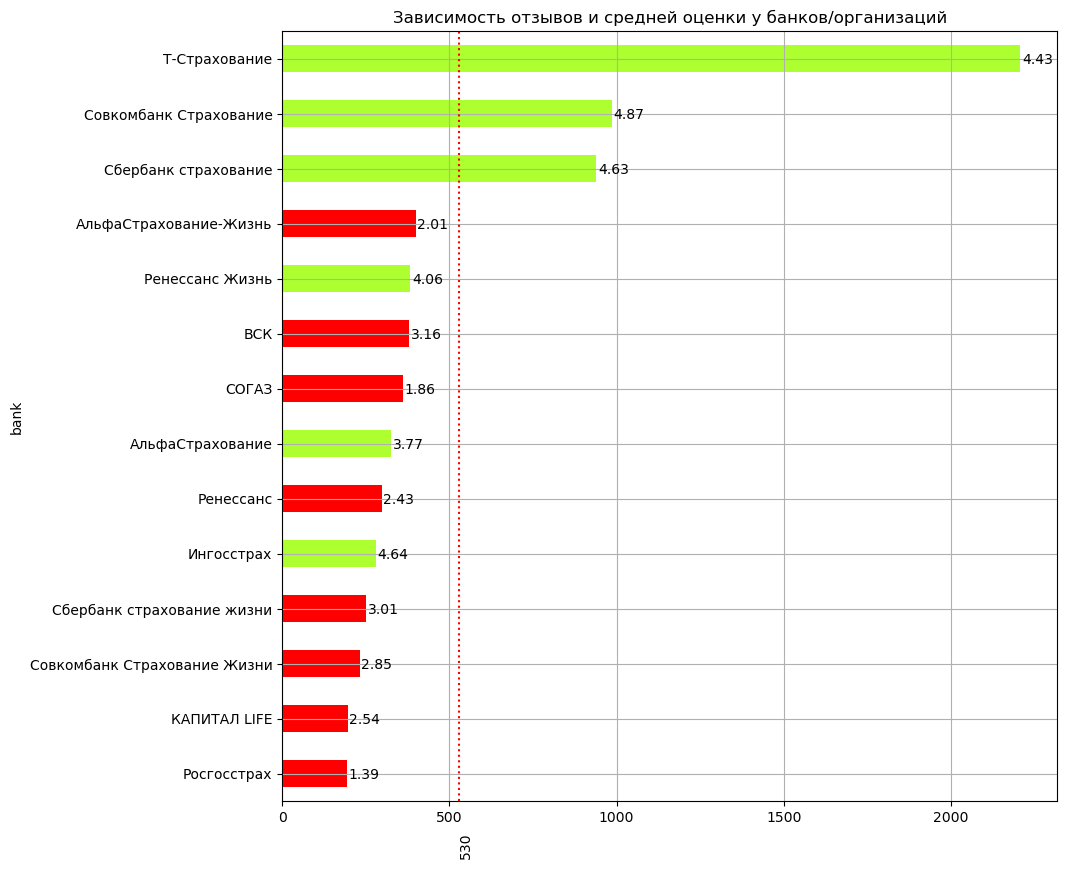

In [57]:
colors = ["red" if rate < 3.73 else "greenyellow" for rate in all_mean_rates]

plt.figure(figsize=(10, 10))
all_reviews.sort_values(ascending=True).plot(kind = "barh", color = colors)
plt.title("Зависимость отзывов и средней оценки у банков/организаций")

for i, (value, mean_value) in enumerate(zip(all_reviews.sort_values(ascending=True), all_mean_rates)):
    plt.text(value + 5, i, f"{mean_value:.2f}", va='center_baseline')

plt.axvline(x = 530, color = "red", linestyle = "dotted")
plt.text(x=530, y=-1.5, s=str(530), rotation="vertical")
plt.grid()
plt.show()

**Вывод**

На диаграмме отображена зависимость между количеством отзывов и средней оценки у организаци.

* красная пунктирная линия - среднее количество отзывов по всем организациям;
* у трех организаций количество отзывов выше среднего показателя: Т-Страхование,Совкомбанк Страхование и Сбербанк Страхование;
* красным цветом выделены организации, у которых средняя оценка ниже среднего показателя;
* чаще всего люди пользуются, оставляют отзывы и ставят положительную оценку организациям:Т-Страхование,Совкомбанк Страхование и Сбербанк Страхование

In [58]:
# Сравнение отзывов по положительным и отрицательным оценкам

In [59]:
# топ 5 дат - дни недели - средние оценки/количество оценок

In [60]:
# средняя оценка по датам/месяцам

## Сравнение классов

In [61]:
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9554,Тинькофф страхование,Т-Страхование,"Все прошло быстро, деньги поступили на карту у...",5,2024-01-21
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20


In [106]:
df["rate"].value_counts()

5    4907
1    2128
2     221
4     120
3      54
Name: rate, dtype: int64

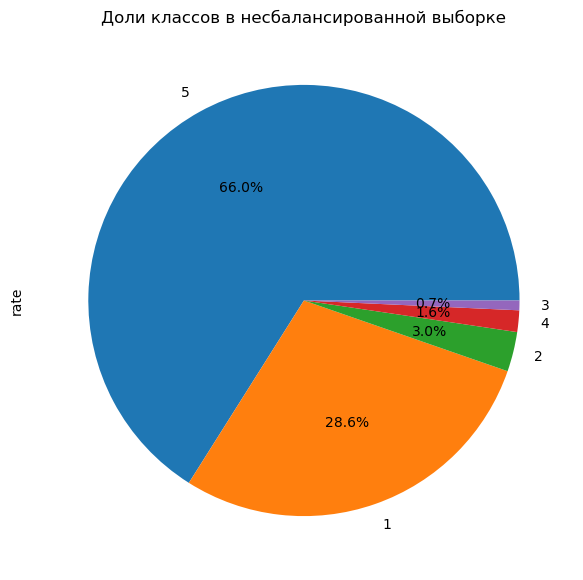

In [62]:
df["rate"].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.title("Доли классов в несбалансированной выборке")
plt.show()

На диаграмме выше видно, что имеется большой разброс в рейтинге:
* максимальное значение - 66.0% (оценка 5)
* минимальное значение - 0.7% (оценка 3)

Поэтому необходимо провести балансировку классов с помощью метода RandomOverSampler.

In [72]:
df.dtypes

header            object
bank              object
review            object
rate               int64
date      datetime64[ns]
dtype: object

In [102]:
# Создание экземпляра RandomOverSampler
# увеличение
ros = RandomOverSampler()

y_ros =df["rate"]
X_ros = df.drop(columns = ["rate"])
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_ros, y_ros)

df_resampled_ros = pd.DataFrame(X_resampled_ros, columns=X_ros.columns)
df_resampled_ros["rate"] = y_resampled_ros

df_resampled_ros

,header,bank,review,date,rate
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,2024-09-22,5
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",2024-09-22,4
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,2024-09-22,1
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",2024-09-22,5
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",2024-09-22,1
...,...,...,...,...,...
24530,ОСАГО,Совкомбанк Страхование,"Не мог продлить ОСАГО, выскакивала ошибка, в ч...",2024-08-14,4
24531,"Хорошо, только очень медленно",Т-Страхование,Стало плохо с средцем в Турции. Написал в Т-Ст...,2024-09-07,4
24532,Выплата по ПВУ,Сбербанк страхование,У меня был застрахован автомобиль по полису ос...,2024-05-31,4
24533,"Страхование ""Защита дома""",Сбербанк страхование,"Хочу оставить отзыв о страховании "" Защита дом...",2024-07-04,4


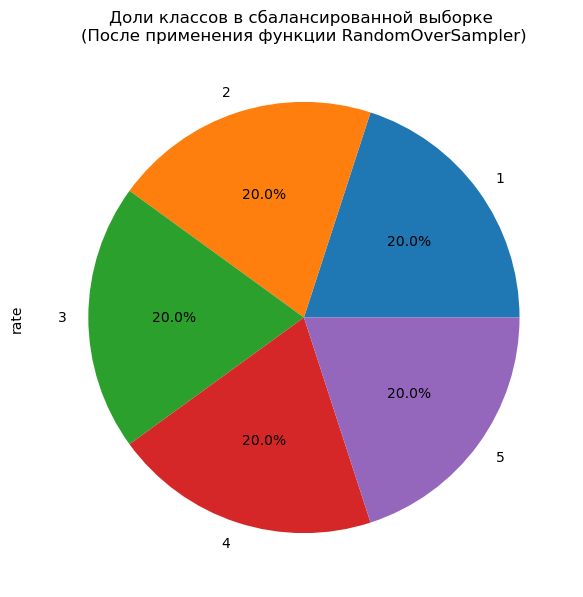

In [103]:
df_resampled_ros["rate"].value_counts().sort_index().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.title("Доли классов в сбалансированной выборке \n(После применения функции RandomOverSampler)")
plt.show()

In [105]:
df_resampled_ros["rate"].value_counts()

5    4907
4    4907
1    4907
2    4907
3    4907
Name: rate, dtype: int64

**Вывод**

После применения метода RandomOverSampler можно заметить, что всех значений стало одинаковое количество.


In [ ]:
# Создание экземпляра RandomOverSampler(уменьшение)
rus = RandomUnderSampler()

X_rus = df.drop(columns=["rate"])
y_rus = df["rate"]

# Применение увеличения выборки к данным
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_rus, y_rus)

df_resampled_rus = pd.DataFrame(X_resampled_rus, columns=X_rus.columns)
df_resampled_rus["rate"] = y_resampled_rus

In [ ]:
df_resampled_rus["rate"].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.title("Доли классов в сбалансированной выборке \n(После применения функции RandomUnderSampler)")
plt.show()